In [2]:
import pandas as pd
import math
import numpy as np

In [9]:
# Load data from csv file
base = pd.read_csv("cardio_base.csv")
# Calculate age based on number of days
base['age'] = round(base['age']/365.2425).astype('int64')

base.sort_values(by=['age'], ascending=True).head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
22343,31922,30,2,175,92.0,100,60,1,0
30666,43842,30,1,159,59.0,120,80,1,0
6219,8850,30,1,175,59.0,120,80,1,0
55905,79749,30,1,160,59.0,110,70,1,0
2784,3927,39,2,170,61.0,120,80,1,0


In [10]:
base.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.304271,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,0.088129
std,28851.302323,6.760672,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.283484
min,0.000000,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000
50%,50001.500000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,0.000000
max,99999.000000,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,1.000000


In [13]:
# Age distribution
(base.groupby('age').size()/base['age'].count()).sort_values()*100

age
30    0.005714
65    0.395714
39    0.671429
43    1.051429
41    1.110000
45    1.128571
47    1.138571
63    1.531429
49    1.604286
61    1.750000
51    1.965714
59    1.965714
53    2.085714
57    2.111429
55    2.240000
42    3.712857
40    3.822857
44    4.007143
46    4.170000
48    4.524286
64    5.521429
62    5.545714
50    7.481429
52    7.550000
60    7.758571
58    8.120000
54    8.510000
56    8.520000
dtype: float64

In [34]:
# Group people by age above 50 and under 50
base['age_group'] = np.where(base['age']>=50, 'above 50', 'under 50')
# Calculate average cholesterol by 
base.groupby('age_group')['cholesterol'].mean()

age_group
above 50    1.415687
under 50    1.234533
Name: cholesterol, dtype: float64

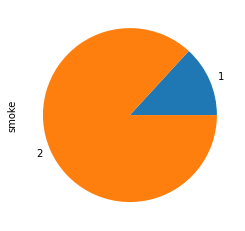

In [8]:
# Calculate smoker by gender
smoker = base.groupby('gender')['smoke'].sum()
smoker
smoker.plot.pie()

In [53]:
# Height distribution
height_group = base.groupby('height').size().reset_index(name='user_num')
height_group['user_percent'] = 100*height_group['user_num']/height_group['user_num'].sum()
# Filter height have distribution >= 1%
height_group.sort_values(by='user_percent')[height_group.user_percent>=1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,height,user_num,user_percent
87,180,879,1.255714
57,150,1051,1.501429
60,153,1059,1.512857
80,173,1077,1.538571
83,176,1145,1.635714
59,152,1161,1.658571
85,178,1227,1.752857
78,171,1312,1.874286
61,154,1443,2.061429
81,174,1557,2.224286
